# Basic Frequentist Fitting

This introductory tutorial on frequentist fitting focuses on _parameter estimation by maximum likelihood model fitting_ and should be completed with reference to [these companion slides](https://github.com/capprogram/2021bootcamp/blob/master/fitting-basic/MaximumLikelihoodBasics.pdf).

Author: Sheila Kannappan (with prior major contributions from Kathleen Eckert, Rohan Isaac, and Amy Oldenberg)<br>
Last Modified: June 2021

## Setup

If you're looking at this notebook, you've presumably already followed these instructions. Please take a moment to complete any that you have not yet finished.

 * go to https://jupyter.org/try
 * click "Try JupyterLab"
 * close open tabs in the Lab (not necessary, just less confusing)
 * open a terminal in the Lab (File>New>Terminal)
 * paste the following into the terminal to get the jupyter notebook:<br/>
  `wget https://raw.githubusercontent.com/capprogram/fitting-basic/master/FrequentistFitting-Basic.ipynb -P /home/jovyan/demo`
 * paste the following into the terminal to get the solutions:<br/>
  `wget https://raw.githubusercontent.com/capprogram/fitting-basic/master/paramfit1_soln.py -P /home/jovyan/demo`
 * if necessary, click the refresh page (curled arrow) at the top of the webpage
 * you can run or re-run individual cells in the notebook by clicking on them and typing Ctrl-Enter

## Why do we fit models to data?

-   To understand the underlying distribution of the data
-   To test hypotheses or competing theoretical models
-   To predict values for future observations

In general, any of these goals will often involve _parameter estimation_. In this tutorial we will go through the basics of parameter estimation using frequentist "maximum likelihood" model fitting.


## Least Squares Fitting

"Least squares" fitting is based on the assumption that all the measurement uncertainties &sigma; in a data set are the same, i.e., follow the same Gaussian distribution. In the case of a linear model, the least squares fit gives the slope & y-intercept parameters that minimize the mean square residuals between the data and the model, where the residuals are measured in the y-direction in the case of "forward" fitting. Here the mean square residuals are given by: <img src="https://latex.codecogs.com/png.latex?\mathrm{rms}^2=\frac{1}{N}\sum{\left(y_i-\left(\alpha&space;x_i&plus;\beta\right)\right&space;)^2}"/> where x<sub>i</sub> is the independent variable, y<sub>i</sub> is the dependent variable, and &alpha; and &beta; are the slope and y-intercept parameter values. Minimizing the mean square residuals is equivalent to minimizing the rms (root mean square) residuals, and also equivalent to minimizing the &chi;<sup>2</sup>, because of the fact that all &sigma;'s have been assumed to be identical.

Least squares fitting falls within the broader category of parameter estimation known as *Maximum Likelihood Estimation* (MLE). In this method, we measure the likelihood for a given model, typically using the &chi;<sup>2</sup> statistic:

The likelihood is given by: <img src="https://latex.codecogs.com/png.latex?L=\exp{\frac{-\chi^2}{2}}"/> where <img src="https://latex.codecogs.com/png.latex?\chi^2=\sum\frac{\left(y_{value,i}-y_{model,i}\right)^2}{\sigma_i^2}"/>

To find the MLE solution to our model, we maximize the likelihood function by taking the derivative with respect to each parameter (the slope and y-intercept in the case of a linear fit) and by solving for where each derivative is equal to 0. To simplify the math, we first take the natural log of the likelihood function. For least squares fitting (wherein all &sigma; values are taken to be equal), it is possible to obtain an analytic solution for the slope and y-intercept of a linear model, as shown below.

### Analytic solution to the linear least squares fitting problem

Take the natural log of the likelihood function <img src="https://latex.codecogs.com/png.latex?\ln(L)=-\frac{1}{2}\chi^2=-\frac{1}{2}\sum\frac{\left(y_i-\left(\alpha&space;x_i&plus;\beta\right)\right&space;)^2}{\sigma_i^2}"/>

Take the derivatives of ln(L) with respect to &alpha; and &beta; and set those equations to 0:<br>
<img src="https://latex.codecogs.com/png.latex?\frac{d\ln(L)}{d\alpha}=-\sum\frac{\left(y_i-\left(\alpha&space;x_i&plus;\beta\right)\right)(-x_i)}{\sigma_i^2}=0"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; and &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; <img src="https://latex.codecogs.com/png.latex?\frac{d\ln(L)}{d\beta}=-\sum\frac{\left(y_i-\left(\alpha&space;x_i&plus;\beta\right)\right)(-1)}{\sigma_i^2}=0"/> .

If we assume the $\sigma$<sub>i</sub>'s are all the same, then we have two equations for two unknowns to solve:

**eqn 1:** <img src="https://latex.codecogs.com/png.latex?\sum&space;y_i&space;x_i-\alpha\sum&space;x_i^2-\beta\sum&space;x_i=0"/> 

**eqn 2:** <img src="https://latex.codecogs.com/png.latex?\sum&space;y_i-\alpha\sum&space;x_i-N\beta=0"/> 

Multiply eqn 1 by N and multiply eqn 2 by <img src="https://latex.codecogs.com/png.latex?\sum&space;x_i"/> to get:

**eqn 1** <img src="https://latex.codecogs.com/png.latex?N\sum&space;y_i&space;x_i-N\alpha\sum&space;x_i^2-N\beta\sum&space;x_i=0"/> 

**eqn 2** <img src="https://latex.codecogs.com/png.latex?\sum&space;x_i\sum&space;y_i-\alpha\sum&space;x_i\sum&space;x_i-N\beta\sum&space;x_i=0"/> 

Now we can set these two equations equal to each other:

<img src="https://latex.codecogs.com/png.latex?N\sum&space;y_i&space;x_i-N\alpha\sum&space;x_i^2=\sum&space;x_i\sum&space;y_i-\alpha(\sum&space;x_i)^2"/>

Solving for &alpha; and dividing the top and bottom by N<sup>2</sup>:

<img src="https://latex.codecogs.com/png.latex?\alpha=\frac{\bar{x}\bar{y}-\bar{xy}}{\bar{x}^2-\bar{(x^2)}}"/>

where the bar over the variable signifies the mean value of that quantity.

Now we can go back and solve for &beta;:

from **eqn 2** <img src="https://latex.codecogs.com/png.latex?\beta=\bar{y}-\alpha\bar{x}"/> 

____

For more complicated functions or if the uncertainties are not uniform, setting the derivatives of the likelihood equal to zero may not lead to equations that are so easily solved analytically. Thus for more complicated MLE problems we typically use programs such as `np.polyfit` or `mpfit` to determine parameters numerically.

## Tutorial:

In the code below we create fake data with random errors around a line of known slope and y-intercept. We then compute the maximum likelihood estimated slope and y-intercept for the fake data. Fill in lines ending with "?" and answer questions by putting your own comments in the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
# ipython "magic" to enable static plot output directly to notebook
%matplotlib inline

# Generate fake data set to start with
alphatrue=2. # slope
betatrue=5.  # intercept
errs=2.5 # sigma (amplitude of errors)

narr=50 # number of data points
xvals = np.arange(narr) + 1. # xvals range from 1-51
yvals = alphatrue*xvals + betatrue + npr.normal(0,errs,narr) # yvals 
# What aspect of a real data set does npr.normal emulate here?

# What assumption is made here in the unweighted least squares approach?

Text(0, 0.5, 'y-values')

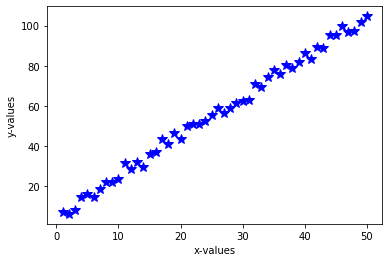

In [2]:
# Plot fake data
plt.plot(xvals,yvals,'b*',markersize=10)
plt.xlabel("x-values")
plt.ylabel("y-values")

### Analytic Linear Fit
Read over the derivation of the analytic solution to the linear least squares fitting problem (above). Add code below to compute the estimated slope and y-intercept based on the fake data set. Plot the maximum likelihood ("best fit") solution on top of the data.

In [6]:
# Determine slope & y-intercept using least squares analytic solution 

#alphaest=(np.mean(xvals)*np.mean(yvals)-np.mean(xvals*yvals)) / \
#   (np.mean(xvals)**2 -np.mean(xvals**2)) #  from derivation
#betaest= ? # calculate estimate of y-intercept from derivation

# Why must we use alphaest rather than alphatrue above?

# The MLE values of the slope and y-intercept are equivalent to the "least
# squares" fit results.
print("analytical MLE slope = %0.7f" %alphaest)
print("analytical MLE y-intercept = %0.7f" %?)

analytical MLE slope = 1.9866567
analytical MLE y-intercept = 5.1496390


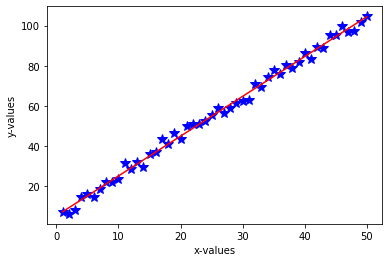

In [7]:
# Replot fake data
plt.plot(xvals,yvals,'b*',markersize=10)
plt.xlabel("x-values")
plt.ylabel("y-values")

# Overplot the MLE ("best fit") solution
yfitvals=xvals*alphaest+betaest
plt.plot(xvals,yfitvals,'r')

### Analytic uncertainties
For linear least squares fitting, we can obtain analytic formulae for the uncertainties on the slope and y-intercept estimates, which have been provided below. (See http://mathworld.wolfram.com/LeastSquaresFitting.html for the full derivation.)<br><br>
<img src="https://latex.codecogs.com/png.latex?\sigma_\alpha=\sqrt{\frac{\sum\left(y_i-\left(\alpha&space;x_i&plus;\beta\right)\right&space;)^2}{(N-2)\sum(x_i-\bar{x})^2}}"/><br>
<img src="https://latex.codecogs.com/png.latex?\sigma_\beta=\sqrt{\left(\frac{\sum\left(y_i-\left(\alpha&space;x_i&plus;\beta\right)\right)^2}{N-2}\right)&space;\left(\frac{1}{N}+\frac{(\bar{x})^2}{\sum(x_i-\bar{x})^2}\right)}"/><br><br>

In [8]:
# Compute analytic uncertainties for the slope and y-intercept

alphaunc = np.sqrt(np.sum((yvals - (alphaest*xvals+betaest))**2) / ((narr-2.)*(np.sum((xvals-np.mean(xvals))**2))))
betaunc = np.sqrt((np.sum((yvals - (alphaest*xvals+betaest))**2) / (narr-2.)) * ((1./narr) + (np.mean(xvals)**2)/np.sum((xvals-np.mean(xvals))**2)) )

print("analytic MLE uncertainty on alpha is %0.7f" % (alphaunc))
print("analytic MLE uncertainty on beta is %0.7f" % (betaunc))

print("fractional uncertainty on alpha is %0.7f" % (alphaunc/alphaest))
print("fractional uncertainty on beta is %0.7f" % (betaunc/betaest))

# Which parameter has larger fractional uncertainty?

analytic MLE uncertainty on alpha is 0.0214902
analytic MLE uncertainty on beta is 0.6296672
fractional uncertainty on alpha is 0.0108173
fractional uncertainty on beta is 0.1222740


### What if you don't want to do all that algebra (or you can't)?

Most MLE problems do not have analytic solutions, so must be treated numerically. Read up on [np.polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polynomial.polynomial.polyfit.html) to learn how to fit a polynomial. For more complicated functions, you may wish to try [scipy.optimize.curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) or the [python version of mpfit](https://code.google.com/archive/p/astrolibpy/downloads) (original documentation [here](https://pages.physics.wisc.edu/~craigm/idl/fitqa.html)).

In [10]:
# Use `np.polyfit` to compute the slope and y-offset for the same fake 
# data using numerical maximum likelihood estimation. 

# third parameter is order of fit, 1 for linear
pfit = np.polyfit(xvals,yvals,1) # returns coeff. of highest order term first

print("               ") # whitespace for readability
print("np.polyfit MLE slope = %0.7f" %pfit[0])
print("np.polyfit MLE y-intercept = %0.7f" %pfit[1])

# Do you get the same result as in the analytic case? 

               
np.polyfit MLE slope = 1.9866567
np.polyfit MLE y-intercept = 5.1496390


Note: In the above example we assumed that the &sigma; values on all data points were the same. This simplified assumption is often not the case. If the uncertainties differ, then we must include each data point's uncertainty within the MLE calculation. Although `np.polyfit` does not automatically take an array of uncertainties on the y value, we can input an optional weight vector: `fit=np.polyfit(xvals, yvals, 1, w=1/sig)` where `sig` is an array containing the uncertainty on each data point. Here the input is `1/sig` rather than `1/sig**2` as you might expect. The `np.polyfit` function squares the weight value within the source code.

### Numerically estimating uncertainties

A quick method to determine uncertainties numerically is to have `np.polyfit` compute the covariance matrix:
<img src="https://latex.codecogs.com/png.latex?C=\begin{pmatrix}\sigma_a^2&cov(\alpha,\beta)\\cov(\alpha,\beta)&\sigma_\beta^2\end{pmatrix}"/> which is the inverse of the Hessian Matrix, consisting of second derivatives of the log likelihood with respect to different model parameters. When these matrices get tricky to compute, we can resort to even more approximate numerical techniques such as the bootstrap (which is another tutorial in the bootcamp).

Below we add `cov="True"` to the `np.polyfit` function call to compute the covariance matrix numerically. 

In [14]:
# calculate and print parameter uncertainties from the diagonal terms
# of the covariance matrix, which is the inverse of the Hessian matrix
# and can be computed in np.polyfit by setting cov='True'

pfit,covp = np.polyfit(xvals, yvals, 1, cov='True') # returns coeff. of highest power first

print("slope is %0.7f +- %0.7f" % (pfit[0], np.sqrt(covp[0,0])))
print("intercept is %0.7f +- %0.7f" % (pfit[1], np.sqrt(covp[1,1])))

# How are the errors related to the terms of the covariance matrix?

# Are the uncertainties the same as in the analytic solution?

slope is 1.9866567 +- 0.0214902
intercept is 5.1496390 +- 0.6296672


Finally, let's compare the analytically and numerically derived uncertainties for different sizes of data set. Try narr=10 and narr=100 in the code below, which recaps our calculations thus far and computes the fractional difference in uncertainties (if any -- this depends on your version of numpy).

In [18]:
# Generate fake data set to start with
alphatrue=2. # slope
betatrue=5.  # intercept
errs=2.5 # sigma (amplitude of errors)

narr=50 # number of data points
xvals = np.arange(narr) + 1. # xvals range from 1-51
yvals = alphatrue*xvals + betatrue + npr.normal(0,errs,narr) # yvals 

# Compute analytic parameters and uncertainties
alphaest=(np.mean(xvals)*np.mean(yvals)-np.mean(xvals*yvals)) / \
   (np.mean(xvals)**2 -np.mean(xvals**2)) #  from derivation
betaest= np.mean(yvals) - alphaest * np.mean(xvals) # calculate estimate of y-intercept from derivation
alphaunc = np.sqrt(np.sum((yvals - (alphaest*xvals+betaest))**2) / ((narr-2.)*(np.sum((xvals-np.mean(xvals))**2))))
betaunc = np.sqrt((np.sum((yvals - (alphaest*xvals+betaest))**2) / (narr-2.)) * ((1./narr) + (np.mean(xvals)**2)/np.sum((xvals-np.mean(xvals))**2)) )

print("analytic slope is %0.7f +- %0.7f" % (alphaest, alphaunc))
print("analytic y-intercept is %0.7f +- %0.7f" % (betaest, betaunc))

# Compute numerical parameters and uncertainties 
pfit,covp = np.polyfit(xvals, yvals, 1, cov='True') # returns coeff. of highest power first

print("numerical slope is %0.7f +- %0.7f" % (pfit[0], np.sqrt(covp[0,0])))
print("numerical y-intercept is %0.7f +- %0.7f" % (pfit[1], np.sqrt(covp[1,1])))

# Try changing narr to 10 or 100 in the code above. Print out the fractional 
# difference in the analytically and numerically derived uncertainties.

fracdiffalpha = (np.sqrt(covp[0,0]) - alphaunc)/alphaunc
fracdiffbeta = (np.sqrt(covp[1,1]) - betaunc)/betaunc

print("fractional difference in uncertainty for slope %0.7f and intercept %0.7f" % (fracdiffalpha,fracdiffbeta))

# What happens to the uncertainties if you increase/decrease the number of points used in the fit (try N=100, N=10) ?

# What happens to the percentage difference between the analytical and numerical methods for computing the uncertanties if you increase/decrease the number of points (try N=100, N=10)?

analytic slope is 1.9616756 +- 0.0258486
analytic y-intercept is 6.3514474 +- 0.7573696
numerical slope is 1.9616756 +- 0.0258486
numerical y-intercept is 6.3514474 +- 0.7573696
fractional difference in uncertainty for slope -0.0000000 and intercept -0.0000000


Solutions to the tutorial (with answers to the questions) can be loaded by executing the cell below.

In [ ]:
%load paramfit1_soln